In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir())
import shap
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'heart.csv', 'Heart_Disease_Prediction.ipynb', 'newplot.png', 'tree.dot']


In [2]:
data = pd.read_csv('heart.csv')
data.shape

(303, 14)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
features = list(data.columns)

for feature in range(len(features)):
    print("Column {0} in the dataset is {1}".format(feature+1, features[feature].title()))

Column 1 in the dataset is Age
Column 2 in the dataset is Sex
Column 3 in the dataset is Cp
Column 4 in the dataset is Trestbps
Column 5 in the dataset is Chol
Column 6 in the dataset is Fbs
Column 7 in the dataset is Restecg
Column 8 in the dataset is Thalach
Column 9 in the dataset is Exang
Column 10 in the dataset is Oldpeak
Column 11 in the dataset is Slope
Column 12 in the dataset is Ca
Column 13 in the dataset is Thal
Column 14 in the dataset is Target


In [6]:
data.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
data[data.duplicated() == True] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
data.drop_duplicates(inplace=True)

n_rows, n_cols = data.shape
print(f"After removing duplicate data we now have {n_rows} data in domain.")

After removing duplicate data we now have 302 data in domain.


In [9]:
profile = pandas_profiling.ProfileReport(data)
profile

In [10]:
data.groupby('target').size()

target
0    138
1    164
dtype: int64

In [11]:
no_disease = len(data[data.target == 0])
with_disease = len(data[data.target == 1])
print(f"The percentage of disease patients within the dataset is {round((with_disease/len(data.target)), 2)*100}% and patients diagnosed with no heart disease is {round((no_disease/len(data.target)), 2)*100}% .")

The percentage of disease patients within the dataset is 54.0% and patients diagnosed with no heart disease is 46.0% .


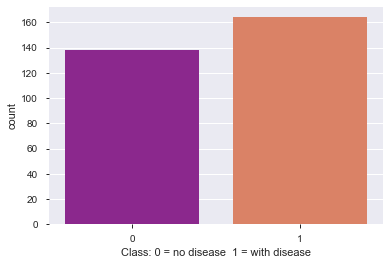

In [12]:
sns.countplot(x='target', data= data, palette='plasma')
plt.xlabel("Class:" " 0 = no disease " " 1 = with disease")
plt.show()

In [13]:
 male_g  = len(data[data.sex == 1])
female_g = len(data[data.sex == 0])

print("There exists {0} male subjects and {1} female subjects which cumputes to {2}% for males and {3}% for females.".format(male_g, female_g, round((male_g/len(data.sex)), 2)*100, round((female_g/len(data.sex)), 2)*100))

There exists 206 male subjects and 96 female subjects which cumputes to 68.0% for males and 32.0% for females.


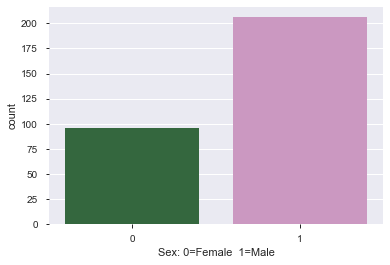

In [14]:
sns.countplot(x='sex', data=data, palette='cubehelix')
plt.xlabel("Sex: 0=Female "" 1=Male")
plt.show()

In [15]:
gender_impact = pd.crosstab(data['sex'], data['target'])
gender_impact

target,0,1
sex,,
0,24,72
1,114,92


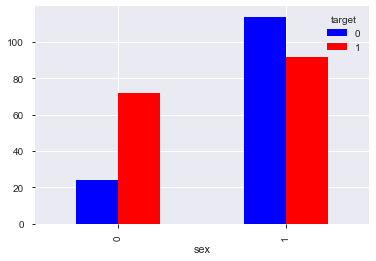

In [16]:
gender_impact.plot(kind='bar', stacked=False, color=["BLUE", "RED"])

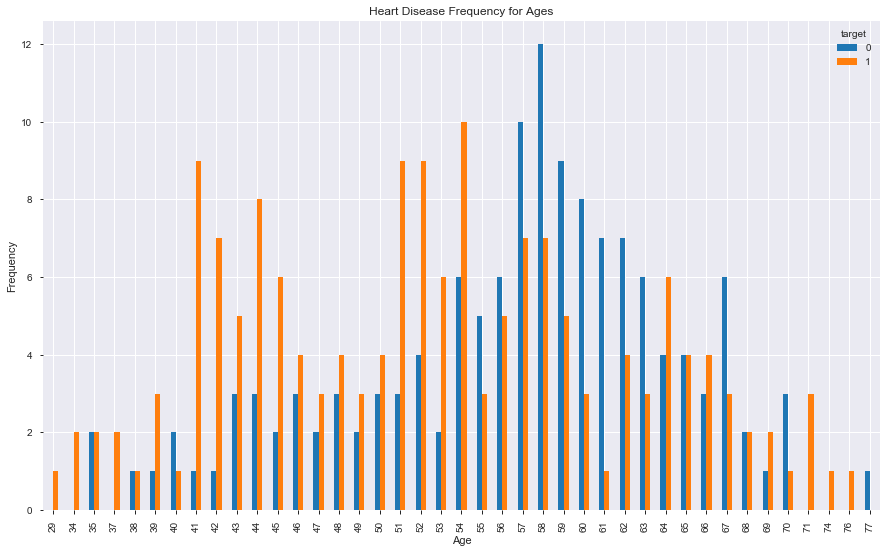

In [17]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,9))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

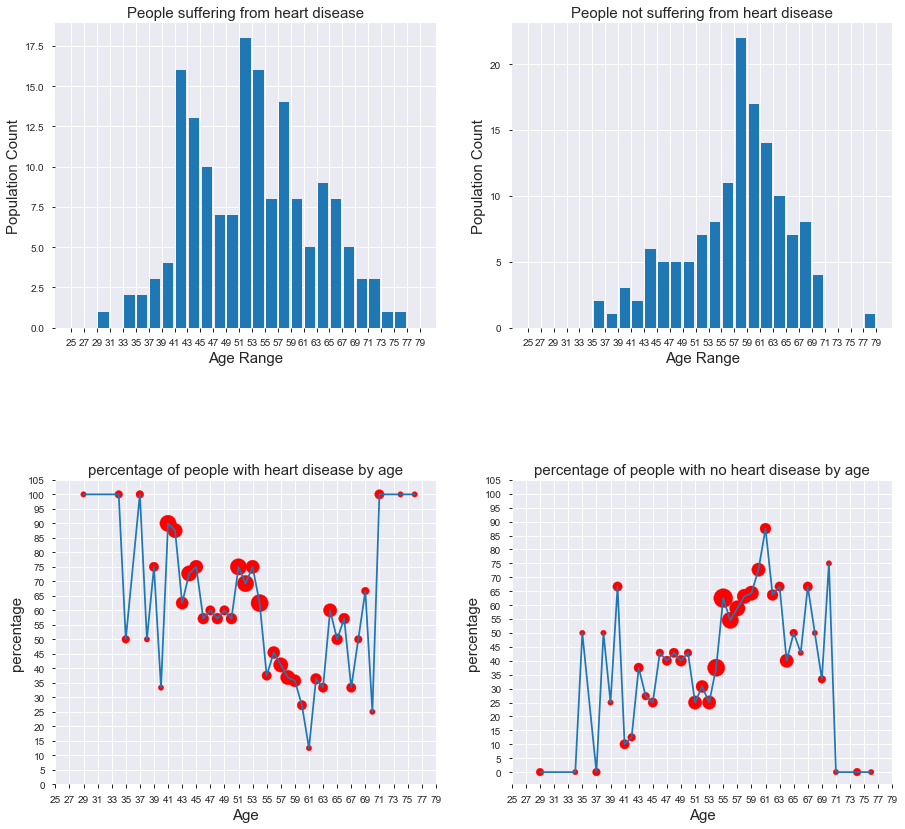

In [18]:
x = data.groupby(['age','target']).agg({'sex':'count'})
y = data.groupby(['age']).agg({'sex':'count'})
z = (x.div(y, level='age') * 100)
q= 100 - z
bin_x = range(25,80,2)

fig, axes = plt.subplots(2,2, figsize = (15,14))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].hist(data[data['target']==1].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age Range',fontsize=15)
axes[0,0].set_ylabel('Population Count',fontsize=15)
axes[0,0].set_title('People suffering from heart disease',fontsize=15)

axes[0,1].hist(data[data['target']==0].age.tolist(),bins=bin_x,rwidth=0.8)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age Range',fontsize=15)
axes[0,1].set_ylabel('Population Count',fontsize=15)
axes[0,1].set_title('People not suffering from heart disease',fontsize=15)

axes[1,0].scatter(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex,s=(x.xs(1,level=1).sex)*30,edgecolors = 'r',c = 'red')
axes[1,0].plot(z.xs(1,level=1).reset_index().age,z.xs(1,level=1).reset_index().sex)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_yticks(range(0,110,5))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('percentage',fontsize=15)
axes[1,0].set_title('percentage of people with heart disease by age',fontsize=15)

axes[1,1].scatter(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex,s=(x.xs(0,level=1).sex)*30,edgecolors = 'r',c = 'red')
axes[1,1].plot(z.xs(1,level=1).reset_index().age,q.xs(1,level=1).reset_index().sex)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_yticks(range(0,110,5))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('percentage',fontsize=15)
axes[1,1].set_title('percentage of people with no heart disease by age',fontsize=15)

plt.show()

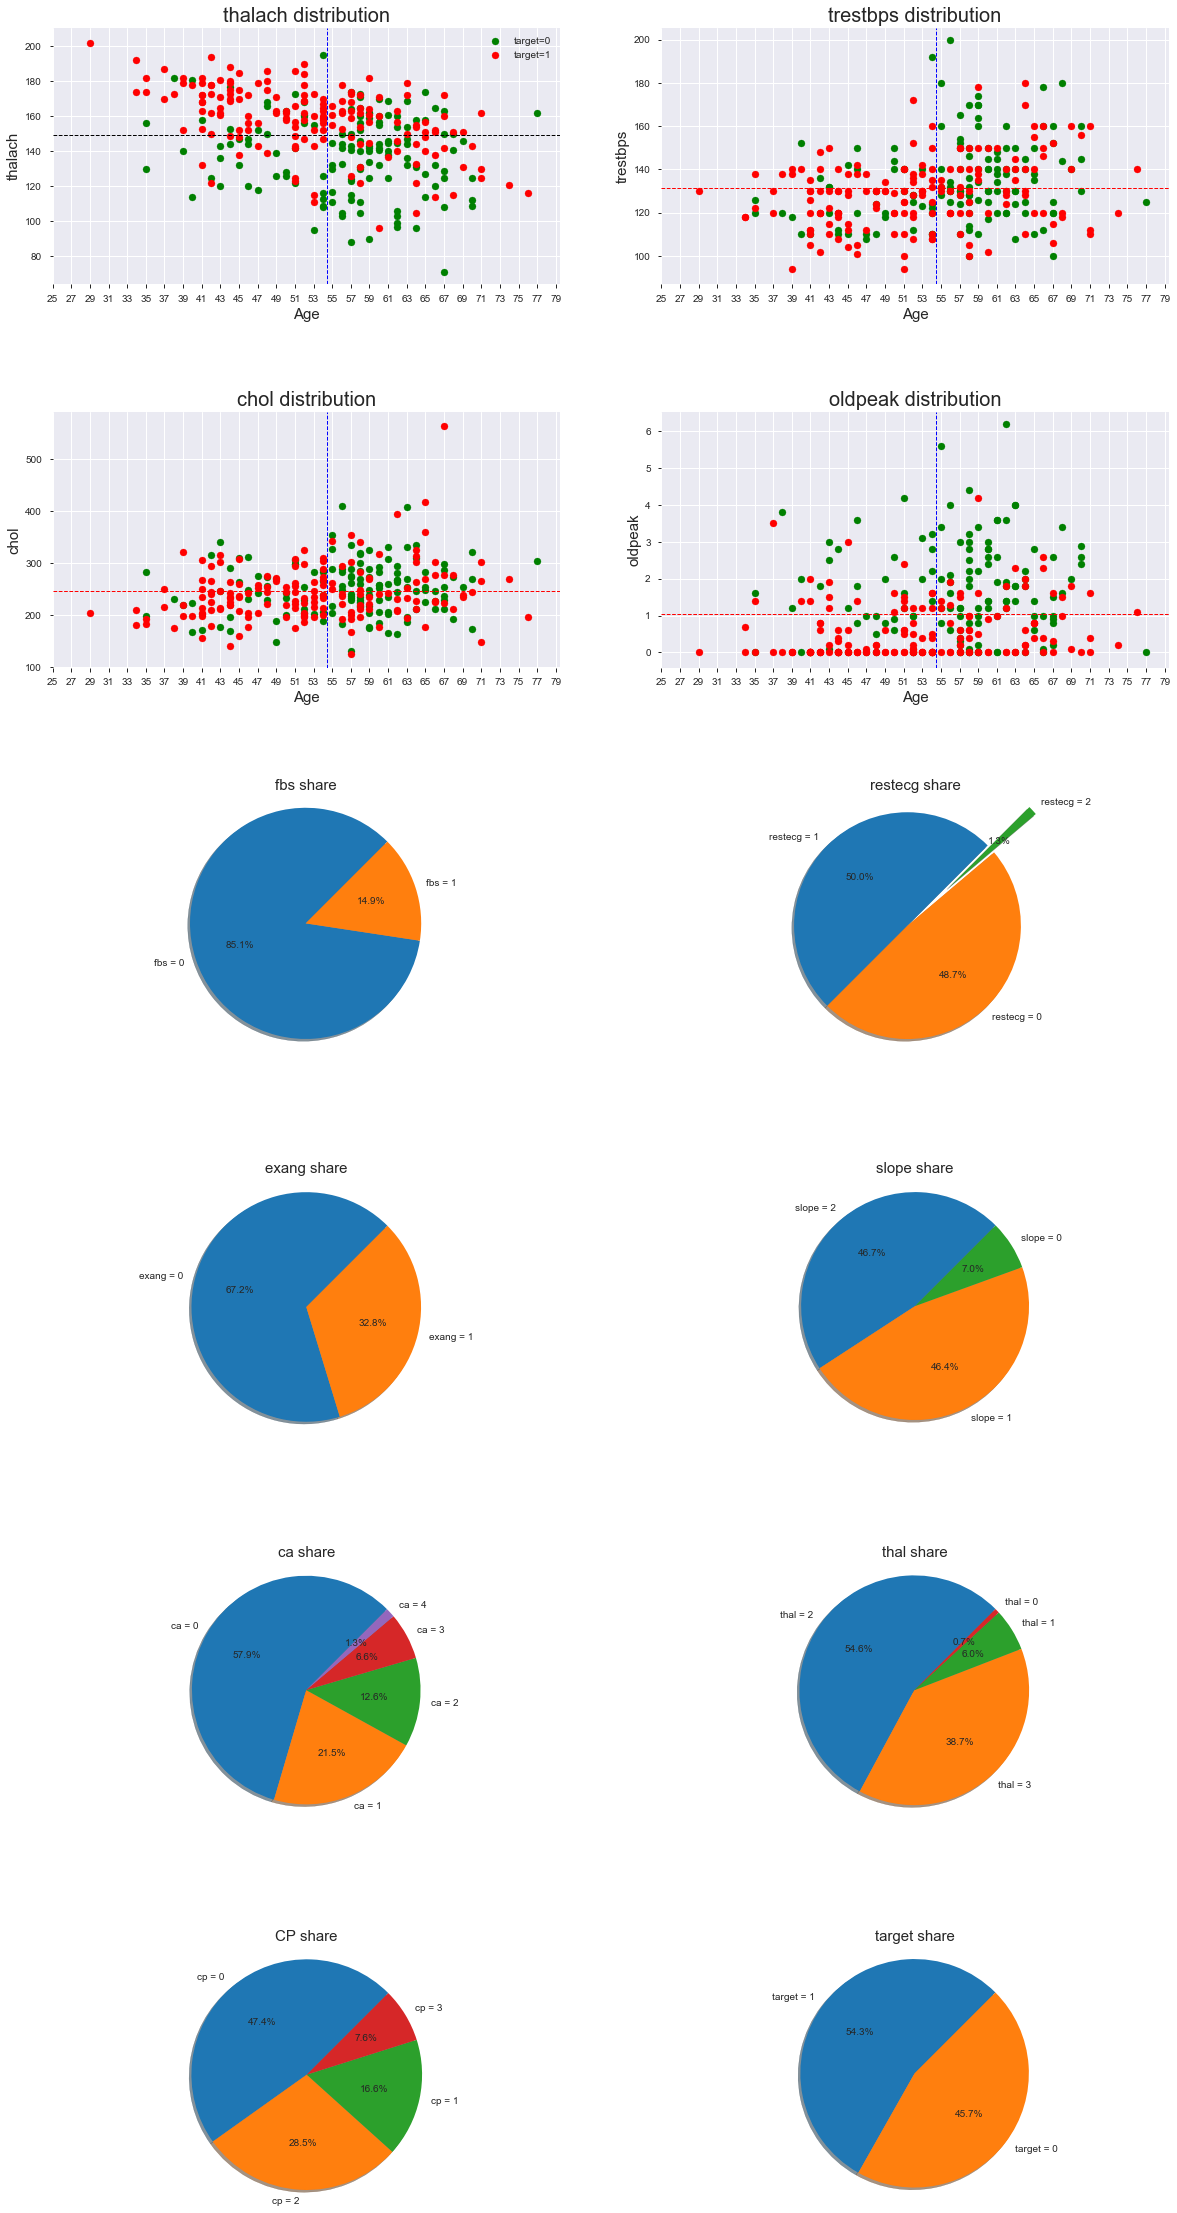

In [19]:
fig, axes = plt.subplots(6,2, figsize = (20,40))
plt.subplots_adjust(hspace = 0.5)

axes[0,0].scatter(data[data['target']==0][['age','thalach']].sort_values(by = ['age']).age,data[data['target']==0][['age','thalach']].sort_values(by = ['age']).thalach, c = 'g',label = 'target=0')
axes[0,0].scatter(data[data['target']==1][['age','thalach']].sort_values(by = ['age']).age,data[data['target']==1][['age','thalach']].sort_values(by = ['age']).thalach, c = 'r',label = 'target=1')
axes[0,0].set_title('thalach distribution',fontsize=20)
axes[0,0].set_xticks(range(25,80,2))
axes[0,0].set_xlabel('Age',fontsize=15)
axes[0,0].set_ylabel('thalach',fontsize=15)
axes[0,0].axhline(np.mean(data['thalach']),xmin=0,xmax=1,linewidth=1, color='black',linestyle = '--')
axes[0,0].axvline(np.mean(data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')
axes[0,0].legend()

axes[0,1].scatter(data[data['target']==0][['age','trestbps']].sort_values(by = ['age']).age,data[data['target']==0][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'g',label = 'target=0')
axes[0,1].scatter(data[data['target']==1][['age','trestbps']].sort_values(by = ['age']).age,data[data['target']==1][['age','trestbps']].sort_values(by = ['age']).trestbps, c = 'r',label = 'target=1')
axes[0,1].set_title('trestbps distribution',fontsize=20)
axes[0,1].set_xticks(range(25,80,2))
axes[0,1].set_xlabel('Age',fontsize=15)
axes[0,1].set_ylabel('trestbps',fontsize=15)
axes[0,1].axhline(np.mean(data['trestbps']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[0,1].axvline(np.mean(data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')


axes[1,0].scatter(data[data['target']==0][['age','chol',]].sort_values(by = ['age']).age,data[data['target']==0][['age','chol',]].sort_values(by = ['age']).chol,c = 'g',label = 'target=0')
axes[1,0].scatter(data[data['target']==1][['age','chol',]].sort_values(by = ['age']).age,data[data['target']==1][['age','chol',]].sort_values(by = ['age']).chol,c = 'r',label = 'target=1')
axes[1,0].set_title('chol distribution',fontsize=20)
axes[1,0].set_xticks(range(25,80,2))
axes[1,0].set_xlabel('Age',fontsize=15)
axes[1,0].set_ylabel('chol',fontsize=15)
axes[1,0].axhline(np.mean(data['chol']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,0].axvline(np.mean(data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

axes[1,1].scatter(data[data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).age,data[data['target']==0][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'g',label = 'target=0')
axes[1,1].scatter(data[data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).age,data[data['target']==1][['age','oldpeak',]].sort_values(by = ['age']).oldpeak,c = 'r',label = 'target=1')
axes[1,1].set_title('oldpeak distribution',fontsize=20)
axes[1,1].set_xticks(range(25,80,2))
axes[1,1].set_xlabel('Age',fontsize=15)
axes[1,1].set_ylabel('oldpeak',fontsize=15)
axes[1,1].axhline(np.mean(data['oldpeak']),xmin=0,xmax=1,linewidth=1, color='r',linestyle = '--')
axes[1,1].axvline(np.mean(data['age']),ymin=0,ymax=1,linewidth=1, color='b',linestyle = '--')

fbs_count = data['fbs'].value_counts()
labels = [('fbs = '+ str(x)) for x in fbs_count.index]
axes[2,0].pie(fbs_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[2,0].axis('equal')
axes[2,0].set_title('fbs share',fontsize=15)

restecg_count = data['restecg'].value_counts()
labels = [('restecg = '+ str(x)) for x in restecg_count.index]
axes[2,1].pie(restecg_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45,explode = [0,0,0.5])
axes[2,1].axis('equal')
axes[2,1].set_title('restecg share',fontsize=15)

exang_count = data['exang'].value_counts()
labels = [('exang = '+ str(x)) for x in exang_count.index]
axes[3,0].pie(exang_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,0].axis('equal')
axes[3,0].set_title('exang share',fontsize=15)

slope_count = data['slope'].value_counts()
labels = [('slope = '+ str(x)) for x in slope_count.index]
axes[3,1].pie(slope_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[3,1].axis('equal')
axes[3,1].set_title('slope share',fontsize=15)

ca_count = data['ca'].value_counts()
labels = [('ca = '+ str(x)) for x in ca_count.index]
axes[4,0].pie(ca_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,0].axis('equal')
axes[4,0].set_title('ca share',fontsize=15)

thal_count = data['thal'].value_counts()
labels = [('thal = '+ str(x)) for x in thal_count.index]
axes[4,1].pie(thal_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[4,1].axis('equal')
axes[4,1].set_title('thal share',fontsize=15)

cp_count = data['cp'].value_counts()
labels = [('cp = '+ str(x)) for x in cp_count.index]
axes[5,0].pie(cp_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,0].axis('equal')
axes[5,0].set_title('CP share',fontsize=15)

target_count = data['target'].value_counts()
labels = [('target = '+ str(x)) for x in target_count.index]
axes[5,1].pie(target_count,labels = labels,autopct='%1.1f%%',shadow=True, startangle=45)
axes[5,1].axis('equal')
axes[5,1].set_title('target share',fontsize=15)

plt.show()



In [20]:
categorial = [('sex', ['female', 'male']), 
              ('cp', ['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic']), 
              ('fbs', ['fbs > 120mg', 'fbs < 120mg']), 
              ('restecg', ['normal', 'ST-T wave', 'left ventricular']), 
              ('exang', ['yes', 'no']), 
              ('slope', ['upsloping', 'flat', 'downsloping']), 
              ('thal', ['normal', 'fixed defect', 'reversible defect'])]
continuous = [('trestbps', 'blood pressure in mm Hg'), 
              ('chol', 'serum cholestoral in mg/d'), 
              ('thalach', 'maximum heart rate achieved'), 
              ('oldpeak', 'ST depression by exercise relative to rest'), 
              ('ca', '# major vessels: (0-3) colored by flourosopy')]


def plotTarget():
    sns.countplot(x='target', data=data, ax=ax)

    for i, p in enumerate(ax.patches):
        count = data['target'].value_counts().values[i]
        x = p.get_x() + p.get_width() /2.
        y = p.get_height() + 3
        label = '{:1.2f}'.format(count / float(data.shape[0]))

        ax.text(x, y, label, ha='center')

def plotAge():
    facet_grid = sns.FacetGrid(df, hue='target')
    facet_grid.map(sns.kdeplot, "age", shade=True, ax=axes[0])
    legend_labels = ['disease false', 'disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='age', ylabel='density')

    avg = data[["age", "target"]].groupby(['age'], as_index=False).mean()
    sns.barplot(x='age', y='target', data=avg, ax=axes[1])
    axes[1].set(xlabel='age', ylabel='disease probability')

    plt.clf()
        
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=data, ax=axes[ax_index][0])
    sns.countplot(x='target', hue=attribute, data=data, ax=axes[ax_index][1])
    avg = data[[attribute, 'target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(data[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='target', y=attribute, data=data, ax=axes[ax_index][1])
    
    
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)] 

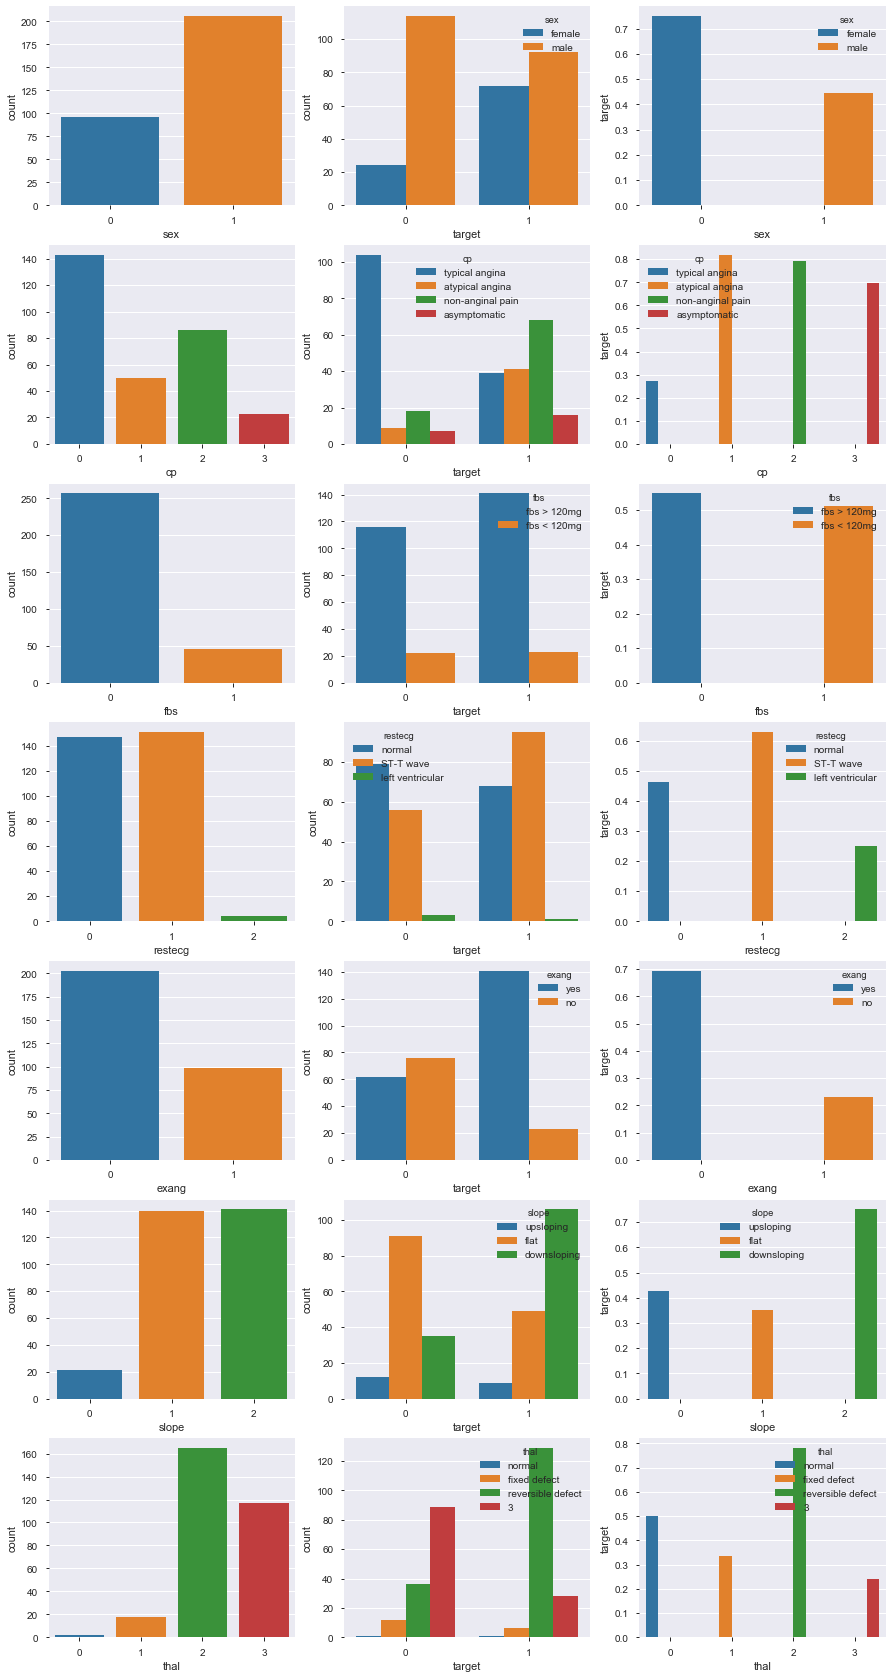

In [21]:
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(15, 30))

plotGrid(isCategorial=True)

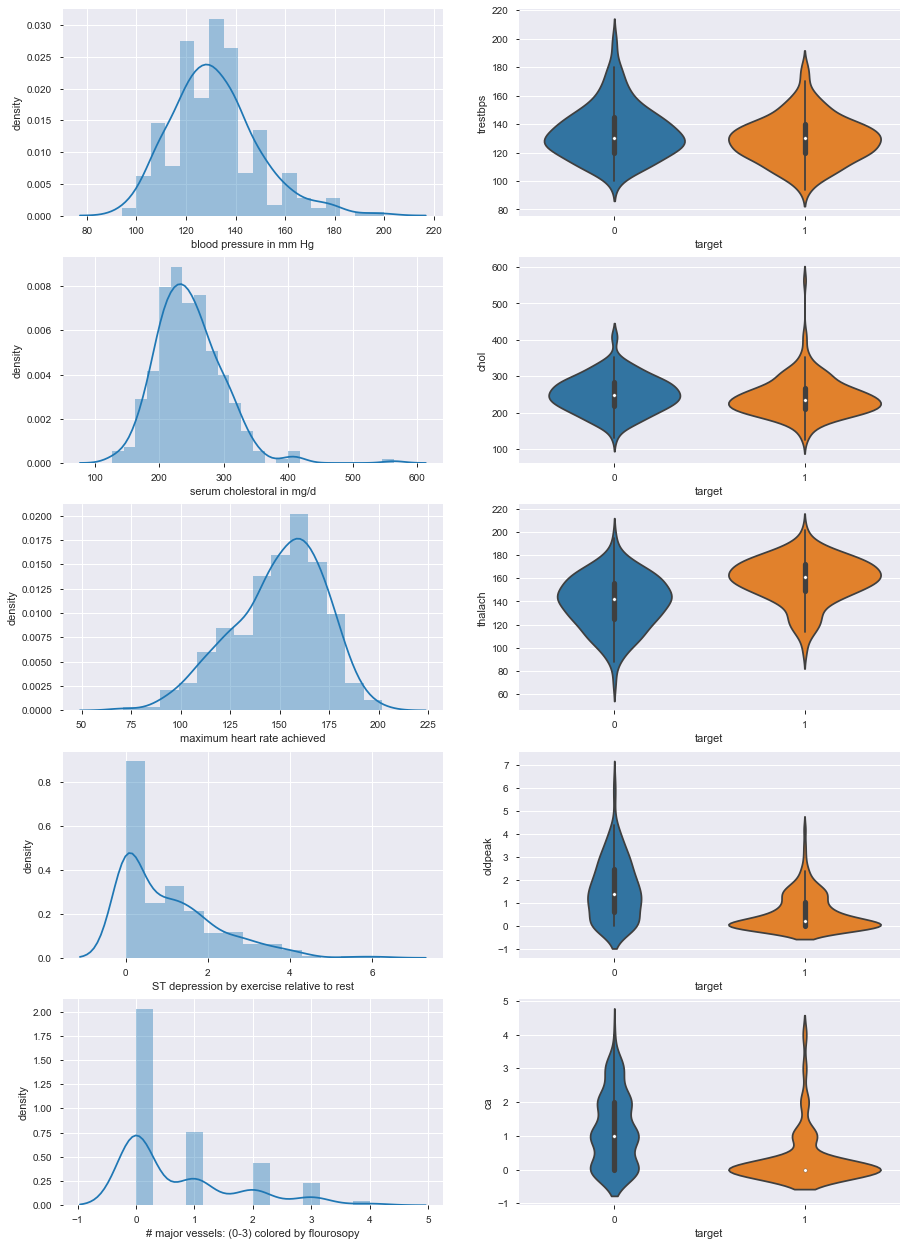

In [22]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(15, 22))

plotGrid(isCategorial=False)

In [23]:
correlations = data.corr()
pd.DataFrame(correlations['target']).sort_values(by='target', ascending=False)

,target
target,1.000000
cp,0.432080
thalach,0.419955
slope,0.343940
restecg,0.134874
fbs,-0.026826
chol,-0.081437
trestbps,-0.146269
age,-0.221476
sex,-0.283609


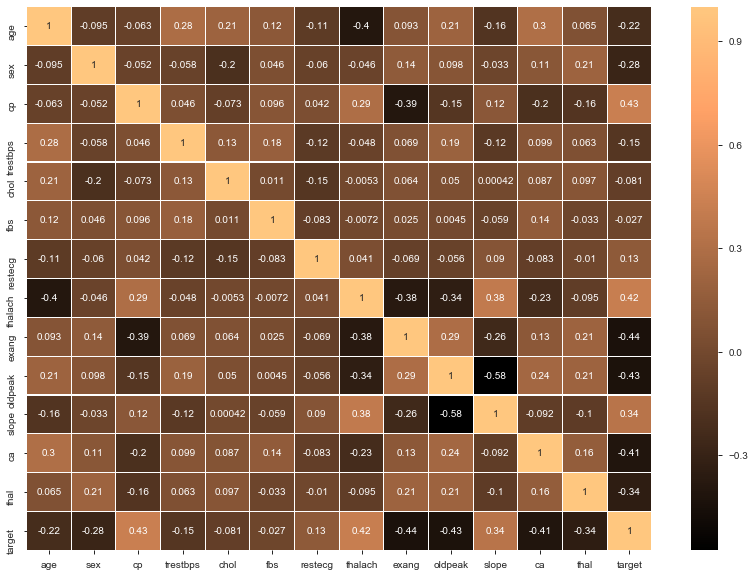

In [24]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), linewidths=.04, annot = True, cmap='copper')
plt.show()

In [25]:
features = ['cp', 'slope', 'thal','restecg']
predictors = pd.get_dummies(data.drop(['target'], axis = 1), columns = features, drop_first=True).values
target= data.target.values

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train.shape

(241, 19)

In [29]:
X_test.shape

(61, 19)

In [30]:
Y_train.shape

(241,)

In [31]:
Y_test.shape

(61,)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC

Training Accuracy  86.72199170124482
Testing Accuracy  88.52459016393442


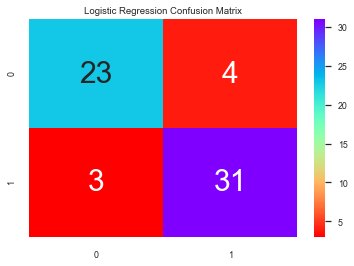

In [33]:
#Logistic regression
lr = LogisticRegression()

lr.fit(X_train,Y_train)
lr_acc=lr.score(X_test, Y_test)*100

print("Training Accuracy ", lr.score(X_train, Y_train)*100)
print("Testing Accuracy ",lr_acc )

Y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(Y_test,Y_pred_lr)

sns.set(font_scale=0.8)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="rainbow_r",fmt="g",cbar=True, annot_kws={"size": 30})

In [34]:
#KNN
knn = KNeighborsClassifier(n_neighbors = 9) 
knn.fit(X_train, Y_train)
prediction = knn.predict(X_test)

#print("{} NN Score: {:.2f}%".format(2, knn.score(X_test, Y_test)*100))


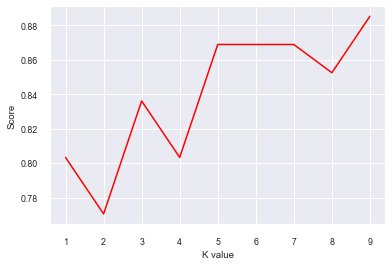

Maximum Accuracy is 88.52%


In [35]:
scoreList = []
for i in range(1,10):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(X_train, Y_train)
    scoreList.append(knn2.score(X_test, Y_test))
    
plt.plot(range(1,10), scoreList, color= "red")
#for i in range(1,10):
    #plt.text(i, scoreList[i-1], (i, scoreList[i-1]))
plt.xticks(np.arange(1,10,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_acc = max(scoreList)*100
print("Maximum Accuracy is {:.2f}%".format(knn_acc))

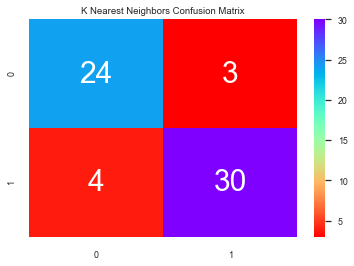

In [36]:
y_head_knn = knn.predict(X_test)
cm_knn = confusion_matrix(Y_test,y_head_knn)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="rainbow_r",fmt="d",cbar=True, annot_kws={"size": 30})

In [37]:
#Support Vector Machine
svm_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svm_classifier = SVC(kernel = kernels[i])
    svm_classifier.fit(X_train, Y_train)
    svm_scores.append(svm_classifier.score(X_test, Y_test))

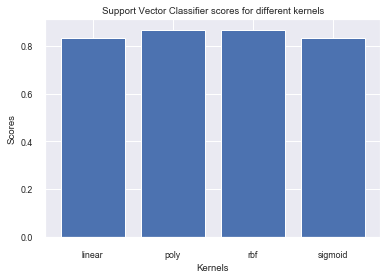

In [38]:
plt.bar(kernels, svm_scores)
colors = np.linspace(0, 1, len(kernels))

for i in range(len(kernels)):
    plt.xlabel('Kernels')
    plt.ylabel('Scores')
    plt.title('Support Vector Classifier scores for different kernels')

In [39]:
svm_acc=svm_scores[1]*100
print("The Accuracy for Support Vector Classifier is {:0.2f}% with {} kernel.".format(svm_acc, 'poly'))

The Accuracy for Support Vector Classifier is 86.89% with poly kernel.


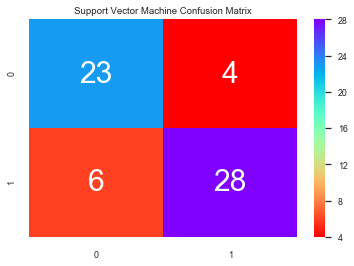

In [40]:
y_head_svm = svm_classifier.predict(X_test)
cm_svm = confusion_matrix(Y_test,y_head_svm)

plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="rainbow_r",fmt="d",cbar=True,annot_kws={"size": 30})

In [41]:
#Random Forest Classification
max_accuracy = 0
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

90.16
67


In [42]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy for Random Forest is: "+str(score_rf)+" %")

The accuracy for Random Forest is: 90.16 %


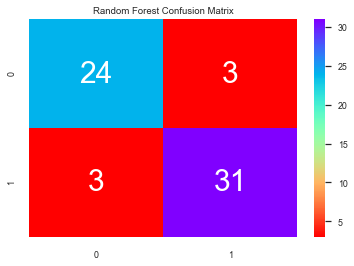

In [50]:
y_head_rf = rf.predict(X_test)
cm_rf = confusion_matrix(Y_test,y_head_rf)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="rainbow_r",fmt="d",cbar=True, annot_kws={"size": 30})

Decision Tree Training Accuracy 100.00%
Decision Tree Testing Accuracy 73.77%


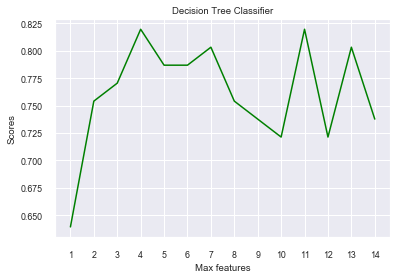

In [51]:
#Decision Tree Classifier
dt_scores = []
for i in range(1, len(data.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, Y_train)
    dt_scores.append(dt_classifier.score(X_test, Y_test))
    
plt.plot([i for i in range(1, len(data.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(data.columns) + 1):
    #plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
    plt.xticks([i for i in range(1, len(data.columns) + 1)])
    plt.xlabel('Max features')
    plt.ylabel('Scores')
    plt.title('Decision Tree Classifier')
    
dt_acc = dt_classifier.score(X_test, Y_test)*100
dt=dt_classifier.score(X_train, Y_train)*100
print("Decision Tree Training Accuracy {:.2f}%".format(dt))
print("Decision Tree Testing Accuracy {:.2f}%".format(dt_acc))

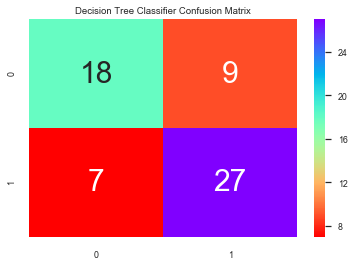

In [52]:
y_head_dt =  dt_classifier.predict(X_test)
cm_dt = confusion_matrix(Y_test,y_head_dt)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="rainbow_r",fmt="d",cbar=True, annot_kws={"size": 30})


In [53]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [54]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=19))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
241/241 [==============================] - 0s 343us/step - loss: 0.7170 - accuracy: 0.5436
Epoch 2/300
241/241 [==============================] - 0s 37us/step - loss: 0.6867 - accuracy: 0.5602
Epoch 3/300
241/241 [==============================] - 0s 50us/step - loss: 0.6594 - accuracy: 0.5809
Epoch 4/300
241/241 [==============================] - 0s 33us/step - loss: 0.6357 - accuracy: 0.6266
Epoch 5/300
241/241 [==============================] - 0s 37us/step - loss: 0.6126 - accuracy: 0.6556
Epoch 6/300
241/241 [==============================] - 0s 46us/step - loss: 0.5923 - accuracy: 0.6680
Epoch 7/300
241/241 [==============================] - 0s 33us/step - loss: 0.5736 - accuracy: 0.6805
Epoch 8/300
241/241 [==============================] - 0s 50us/step - loss: 0.5565 - accuracy: 0.7054
Epoch 9/300
241/241 [==============================] - 0s 41us/step - loss: 0.5404 - accuracy: 0.7303
Epoch 10/300
241/241 [==============================] - 0s 41us/step - loss: 0.52

241/241 [==============================] - 0s 41us/step - loss: 0.2968 - accuracy: 0.8880
Epoch 81/300
241/241 [==============================] - 0s 37us/step - loss: 0.2957 - accuracy: 0.8880
Epoch 82/300
241/241 [==============================] - 0s 33us/step - loss: 0.2945 - accuracy: 0.8880
Epoch 83/300
241/241 [==============================] - 0s 29us/step - loss: 0.2936 - accuracy: 0.8880
Epoch 84/300
241/241 [==============================] - 0s 37us/step - loss: 0.2926 - accuracy: 0.8880
Epoch 85/300
241/241 [==============================] - 0s 33us/step - loss: 0.2918 - accuracy: 0.8880
Epoch 86/300
241/241 [==============================] - 0s 33us/step - loss: 0.2906 - accuracy: 0.8880
Epoch 87/300
241/241 [==============================] - 0s 29us/step - loss: 0.2898 - accuracy: 0.8880
Epoch 88/300
241/241 [==============================] - 0s 33us/step - loss: 0.2888 - accuracy: 0.8880
Epoch 89/300
241/241 [==============================] - 0s 33us/step - loss: 0.2878 - 

241/241 [==============================] - 0s 37us/step - loss: 0.2291 - accuracy: 0.9087
Epoch 160/300
241/241 [==============================] - 0s 37us/step - loss: 0.2283 - accuracy: 0.9046
Epoch 161/300
241/241 [==============================] - 0s 37us/step - loss: 0.2276 - accuracy: 0.9046
Epoch 162/300
241/241 [==============================] - 0s 37us/step - loss: 0.2268 - accuracy: 0.9046
Epoch 163/300
241/241 [==============================] - 0s 33us/step - loss: 0.2262 - accuracy: 0.9046
Epoch 164/300
241/241 [==============================] - 0s 37us/step - loss: 0.2257 - accuracy: 0.9087
Epoch 165/300
241/241 [==============================] - 0s 33us/step - loss: 0.2248 - accuracy: 0.9087
Epoch 166/300
241/241 [==============================] - 0s 46us/step - loss: 0.2241 - accuracy: 0.9087
Epoch 167/300
241/241 [==============================] - 0s 37us/step - loss: 0.2231 - accuracy: 0.9087
Epoch 168/300
241/241 [==============================] - 0s 29us/step - loss: 

241/241 [==============================] - 0s 33us/step - loss: 0.1830 - accuracy: 0.9378
Epoch 238/300
241/241 [==============================] - 0s 33us/step - loss: 0.1823 - accuracy: 0.9419
Epoch 239/300
241/241 [==============================] - 0s 33us/step - loss: 0.1818 - accuracy: 0.9419
Epoch 240/300
241/241 [==============================] - 0s 33us/step - loss: 0.1814 - accuracy: 0.9419
Epoch 241/300
241/241 [==============================] - 0s 33us/step - loss: 0.1810 - accuracy: 0.9378
Epoch 242/300
241/241 [==============================] - 0s 29us/step - loss: 0.1806 - accuracy: 0.9378
Epoch 243/300
241/241 [==============================] - 0s 33us/step - loss: 0.1799 - accuracy: 0.9378
Epoch 244/300
241/241 [==============================] - 0s 29us/step - loss: 0.1794 - accuracy: 0.9378
Epoch 245/300
241/241 [==============================] - 0s 37us/step - loss: 0.1789 - accuracy: 0.9378
Epoch 246/300
241/241 [==============================] - 0s 29us/step - loss: 

In [56]:
Y_pred_nn = model.predict(X_test)

In [57]:
Y_pred_nn.shape

(61, 1)

In [58]:
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded

score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The accuracy for Neural Network is: "+str(score_nn)+" %")

The accuracy for Neural Network is: 86.89 %


In [59]:
scores=[lr_acc,knn_acc,svm_acc,score_rf,dt_acc,score_nn]
AlgorthmsName=["Logistic Regression","KNN","SVM","Random Forest","Decision Tree", "Neural Network"]
trace = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='crimson',
               line =dict(color='crimson',width=4)),
)
data = [trace]
layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [60]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

AUC for SVM: 0.931373


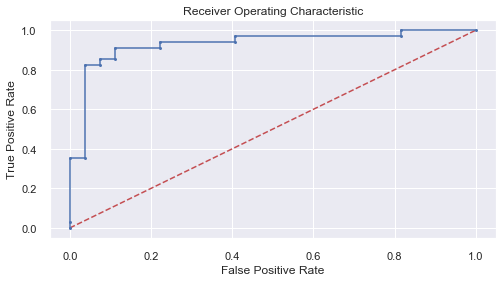

In [71]:
#ROC and AUC curve for SVM
classifier = SVC(kernel = 'poly', C = 1, random_state = 0, probability = True)
classifier.fit(X_train, Y_train)
p = classifier.predict_proba(X_test)
p = p[:, 1]

auc_svm = roc_auc_score(Y_test, p)
print('AUC for SVM: %f' % auc_svm)

fpr, tpr, thresholds = roc_curve(Y_test, p)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC for Random Forest Classifier: 0.936275


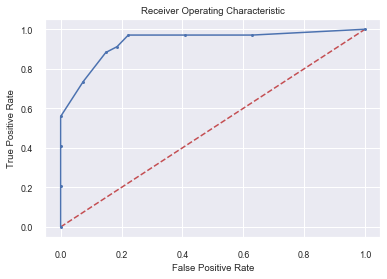

In [62]:
#ROC and AUC curve for RandomForestClassifier
RF = RandomForestClassifier(random_state=2)
RF.fit(X_train, Y_train)
probs = RF.predict_proba(X_test)

probs = probs[:, 1]

auc_randomforest = roc_auc_score(Y_test, probs)
print('AUC for Random Forest Classifier: %f' % auc_randomforest)

fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC for KNN: 0.933551


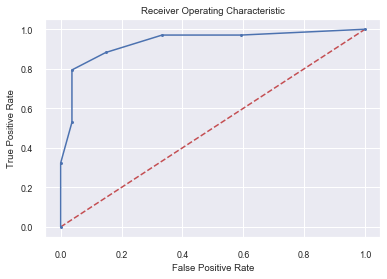

In [63]:
#ROC and AUC curve for KNN
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(X_train, Y_train)
pr = knn.predict_proba(X_test)
pr = pr[:, 1]

auc_knn = roc_auc_score(Y_test, pr)
print('AUC for KNN: %f' % auc_knn)

fpr, tpr, thresholds = roc_curve(Y_test, pr)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC for Logistic Regression: 0.926


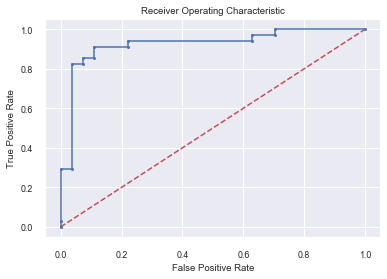

In [64]:
#ROC and AUC curve for LogisticRegression
lr = LogisticRegression() 
lr.fit(X_train, Y_train)
p = lr.predict_proba(X_test)
p = p[:, 1]

auc_lr = roc_auc_score(Y_test, p)
print('AUC for Logistic Regression: %.3f' % auc_lr)

fpr, tpr, thresholds = roc_curve(Y_test, p)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC for Logistic Regression: 0.804


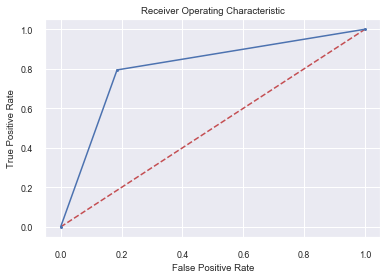

In [65]:
#ROC and AUC curve for DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(max_features = 7, random_state = 0)
dt_classifier.fit(X_train, Y_train)
p = dt_classifier.predict_proba(X_test)
p = p[:, 1]

auc_dt = roc_auc_score(Y_test, p)
print('AUC for Logistic Regression: %.3f' % auc_dt)

fpr, tpr, thresholds = roc_curve(Y_test, p)
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [66]:
print("SVM= %.3f, "%auc_svm,"Random Forest= %.3f, " %auc_randomforest,"KNN= %.3f, "% auc_knn,"Logistic Regression= %.3f, "% auc_lr,"Decision Tress= %.3f "% auc_dt)

SVM= 0.931,  Random Forest= 0.936,  KNN= 0.934,  Logistic Regression= 0.926,  Decision Tress= 0.804 


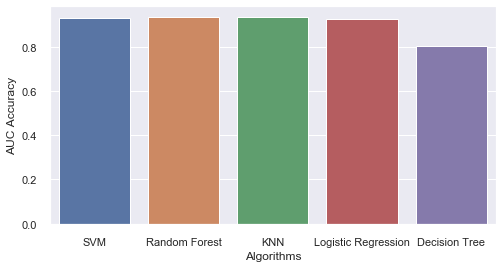

In [67]:
scores=[auc_svm, auc_randomforest, auc_knn, auc_lr, auc_dt]
algorithms=["SVM","Random Forest","KNN","Logistic Regression","Decision Tree"]

sns.set(rc={'figure.figsize':(8,4)})
plt.xlabel("Algorithms")
plt.ylabel("AUC Accuracy")

sns.barplot(algorithms,scores)